### Dessin de trace au sol d'une orbite circulaire de satellite (excentricité nulle)
Le code suivant permet de dessiner des traces au sol d'orbites circulaires. Les hypothèses suivantes sont prises:
- à t0, le satellite se trouve au noeud ascendant, à 0 degré de longitude terrestre.

(Par Maxime Pognon)

In [1]:
# import des fonctions et modules requis
from math import sin, cos, acos, asin, pi, degrees, radians, sqrt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [2]:
#Définition des constantes
RTerre=6371 #en km
PLune=27.32*23.93 #en heures
DLune=384400 #en km
PTerre=23.93 #en heures
VTerre=360/(23.93*60) # en degrés / minute

In [3]:
#la fonction lon() retourne la longitude d'un satellite à alpha degrés sur son orbite d'inclinaison i. 
#À alpha=0, le satellite est au noeud ascendant
def lon(i,alpha):
    alpha=radians(alpha)
    hyp=sqrt((cos(i)*sin(alpha))**2+(cos(alpha))**2)
    return degrees(acos(cos(alpha)/hyp))*np.sign(alpha)

#la fonction lat() retourne la longitude d'un satellite à alpha degrés sur son orbite d'inclinaison i
#À alpha=0, le satellite est au noeud ascendant
def lat(i,alpha):
    alpha=radians(alpha)
    return degrees(asin(sin(i)*sin(alpha)))

#la fonction angle() retourne l'angle parcouru en t minutes, normalisé entre -180 et 180 degrés
def angle(vitesse,t):
    angle=vitesse*t
    reste=angle%180*(-1 )**(angle//180)
    if reste<0:
        return -180-reste
    else:
        return reste

#La fonction plot_gt() dessine en 10000 points la trace au sol en fonction de l'inclinaison en degrés, de l'altitude 
#en km, du sens et de la durée en minute. Par défaut, le sens est prograde et la durée est de 1440 minutes (une journée)
def plot_gt(i,altitude,retrograde=False,durée=1440):
    
    #détermination des paramètres (inclinaison, demi-grand axe, période...)
    i=radians(i)
    a=altitude+RTerre
    PSat=sqrt(PLune**2 * a**3 / DLune**3)
    VSat=360/(PSat*60)
    
    lats=[]
    lons=[]
    
    for t in np.linspace(0,durée,10000):
        
        angleTerre=angle(VTerre,t)
        if retrograde:
            angleSat=angle(VSat,-t)
        else:
            angleSat=angle(VSat,t)

        lats.append(lat(i,angleSat))
        lons.append(lon(i,angleSat)-angleTerre)
        
    fig_map=plt.figure(figsize=(16.53,11.59))
    ax_map=fig_map.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax_map.set_global()
    ax_map.add_feature(cfeature.OCEAN)
    ax_map.gridlines(draw_labels=True)
    #ax_map.set_title('{}-{}-{}-{}'.format(elt,date.year,date.month,value))

    ax_map.scatter(lons,lats,c='black',s=1,transform=ccrs.PlateCarree())

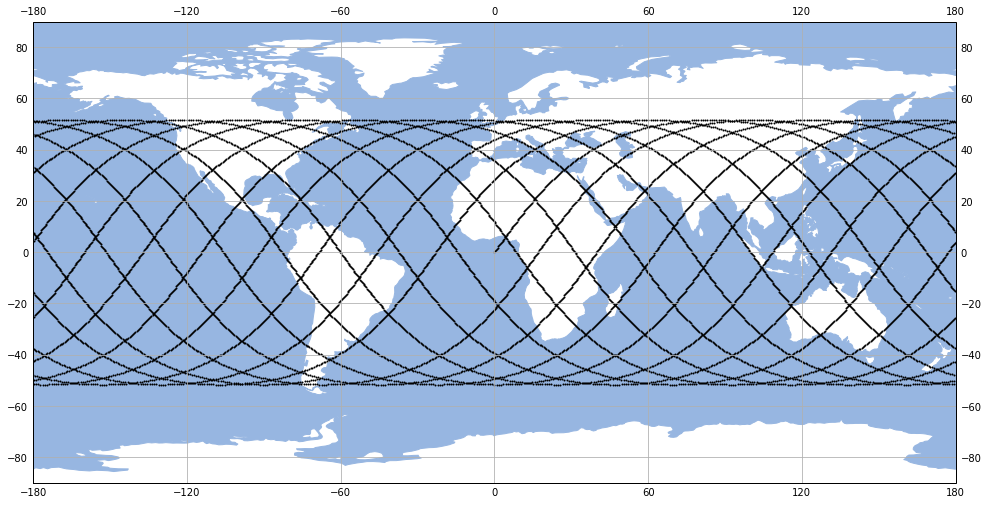

In [4]:
#ISS
plot_gt(51.65,375)

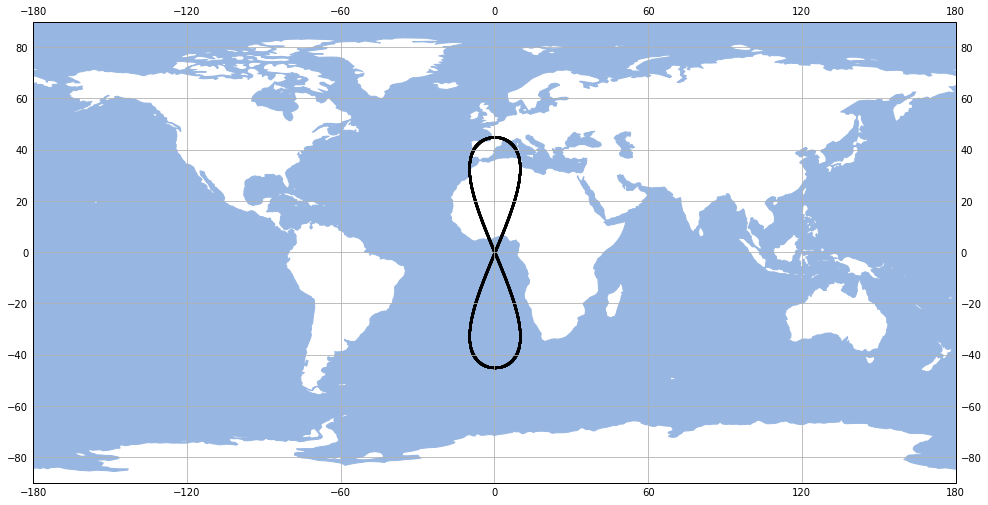

In [5]:
#Orbite Géosynchrone de 45° d'inclinaison
plot_gt(45,36000)

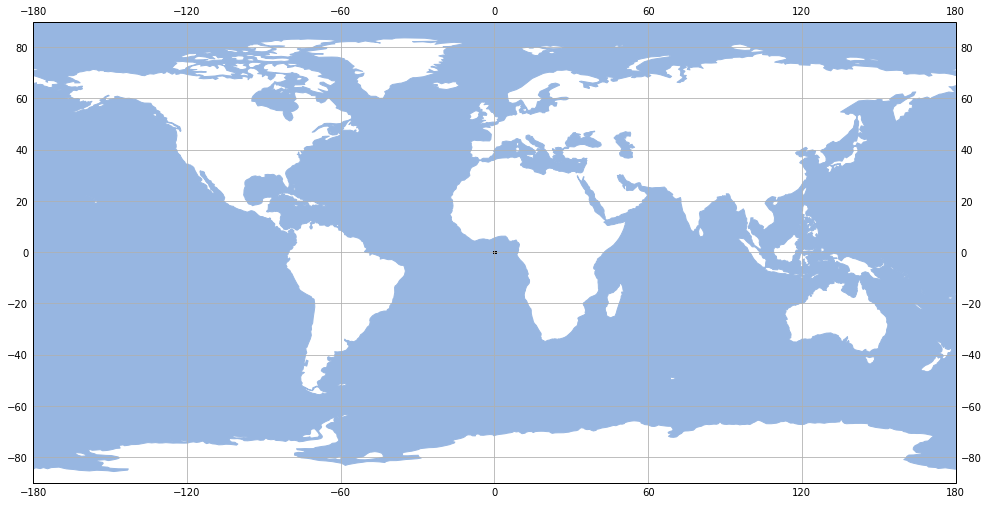

In [6]:
#Orbite Geostationnaire
plot_gt(0,36000)

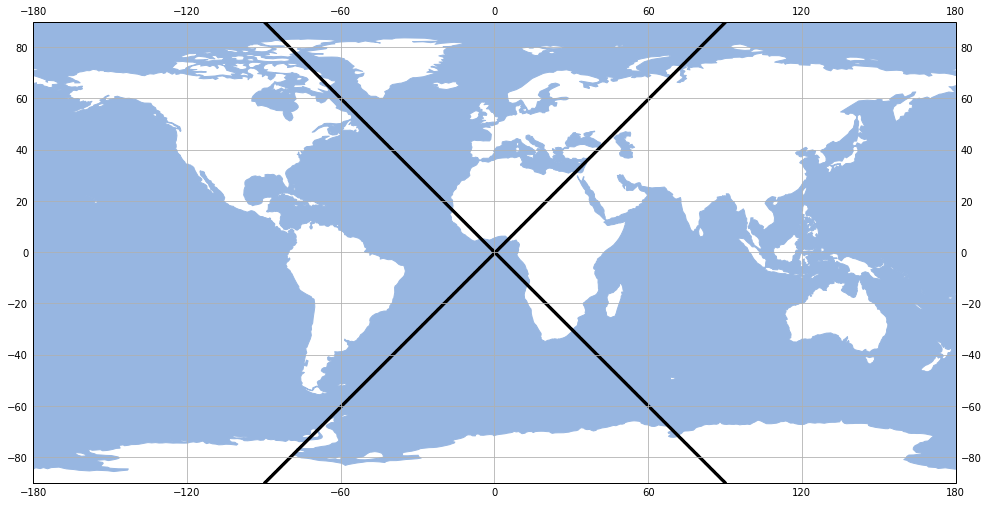

In [7]:
#Orbite Polaire
plot_gt(90,36000)

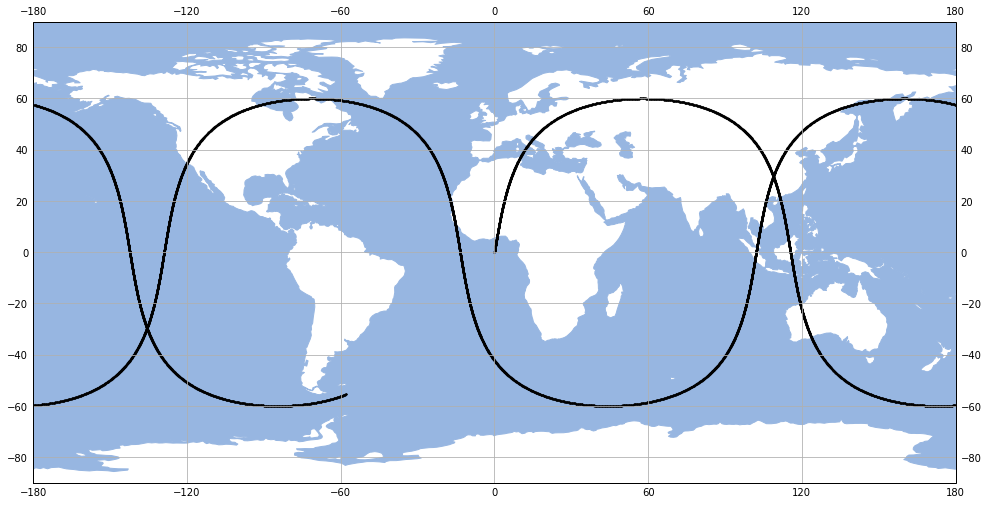

In [8]:
plot_gt(60,15000)

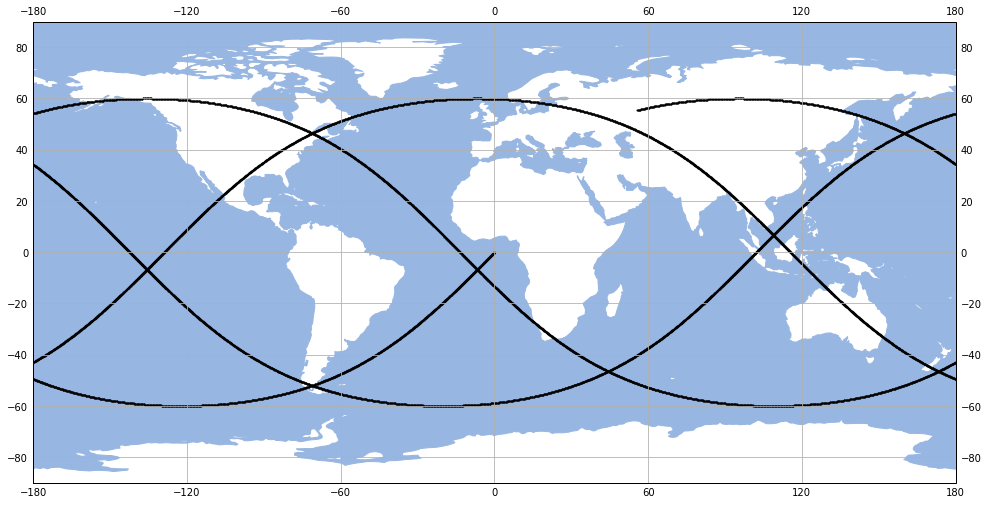

In [9]:
#Même orbite que précédemment mais en retrograde
plot_gt(60,15000,retrograde=True)